In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pytz
# import holidays

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# holidays.country_holidays('CA', years=2018)

In [3]:
pytz.country_timezones['CA'][6]

'America/Toronto'

In [4]:
format = "%Y-%m-%d %H:%M:%S %Z%z"
 
# Current time in UTC
now_utc = datetime.now(pytz.timezone('UTC'))
print(now_utc.strftime(format))
 
now_tz = now_utc.astimezone(pytz.timezone(pytz.country_timezones['CA'][6]))
print(now_tz.strftime(format))

now_tz = now_utc.astimezone(pytz.timezone(pytz.country_timezones['US'][0]))
print(now_tz.strftime(format))

2024-05-13 14:27:30 UTC+0000
2024-05-13 10:27:30 EDT-0400
2024-05-13 10:27:30 EDT-0400


# Temperature

In [5]:
temp_ON = pd.read_csv('ramp_mobility/temperature_profile/renewables_ninja_country_CA_temperature_merra-2_pop-wtd.csv', header=3, usecols=['time', 'CA.ON'], index_col='time')

temp_ON.index = pd.to_datetime(temp_ON.index)
temp_ON.columns = ['temperature']
temp_ON_2018 = temp_ON[temp_ON.index.year == 2018]
temp_ON = temp_ON[temp_ON.index.year >= 1999]

temp_ON = temp_ON.resample('D').mean()

In [6]:
temp_ON.index.strftime('%m-%d')

Index(['01-01', '01-02', '01-03', '01-04', '01-05', '01-06', '01-07', '01-08',
       '01-09', '01-10',
       ...
       '12-22', '12-23', '12-24', '12-25', '12-26', '12-27', '12-28', '12-29',
       '12-30', '12-31'],
      dtype='object', name='time', length=8766)

In [7]:
temp_ON['month-day'] = temp_ON.index.strftime('%m-%d')
temp_ON['year'] = temp_ON.index.year

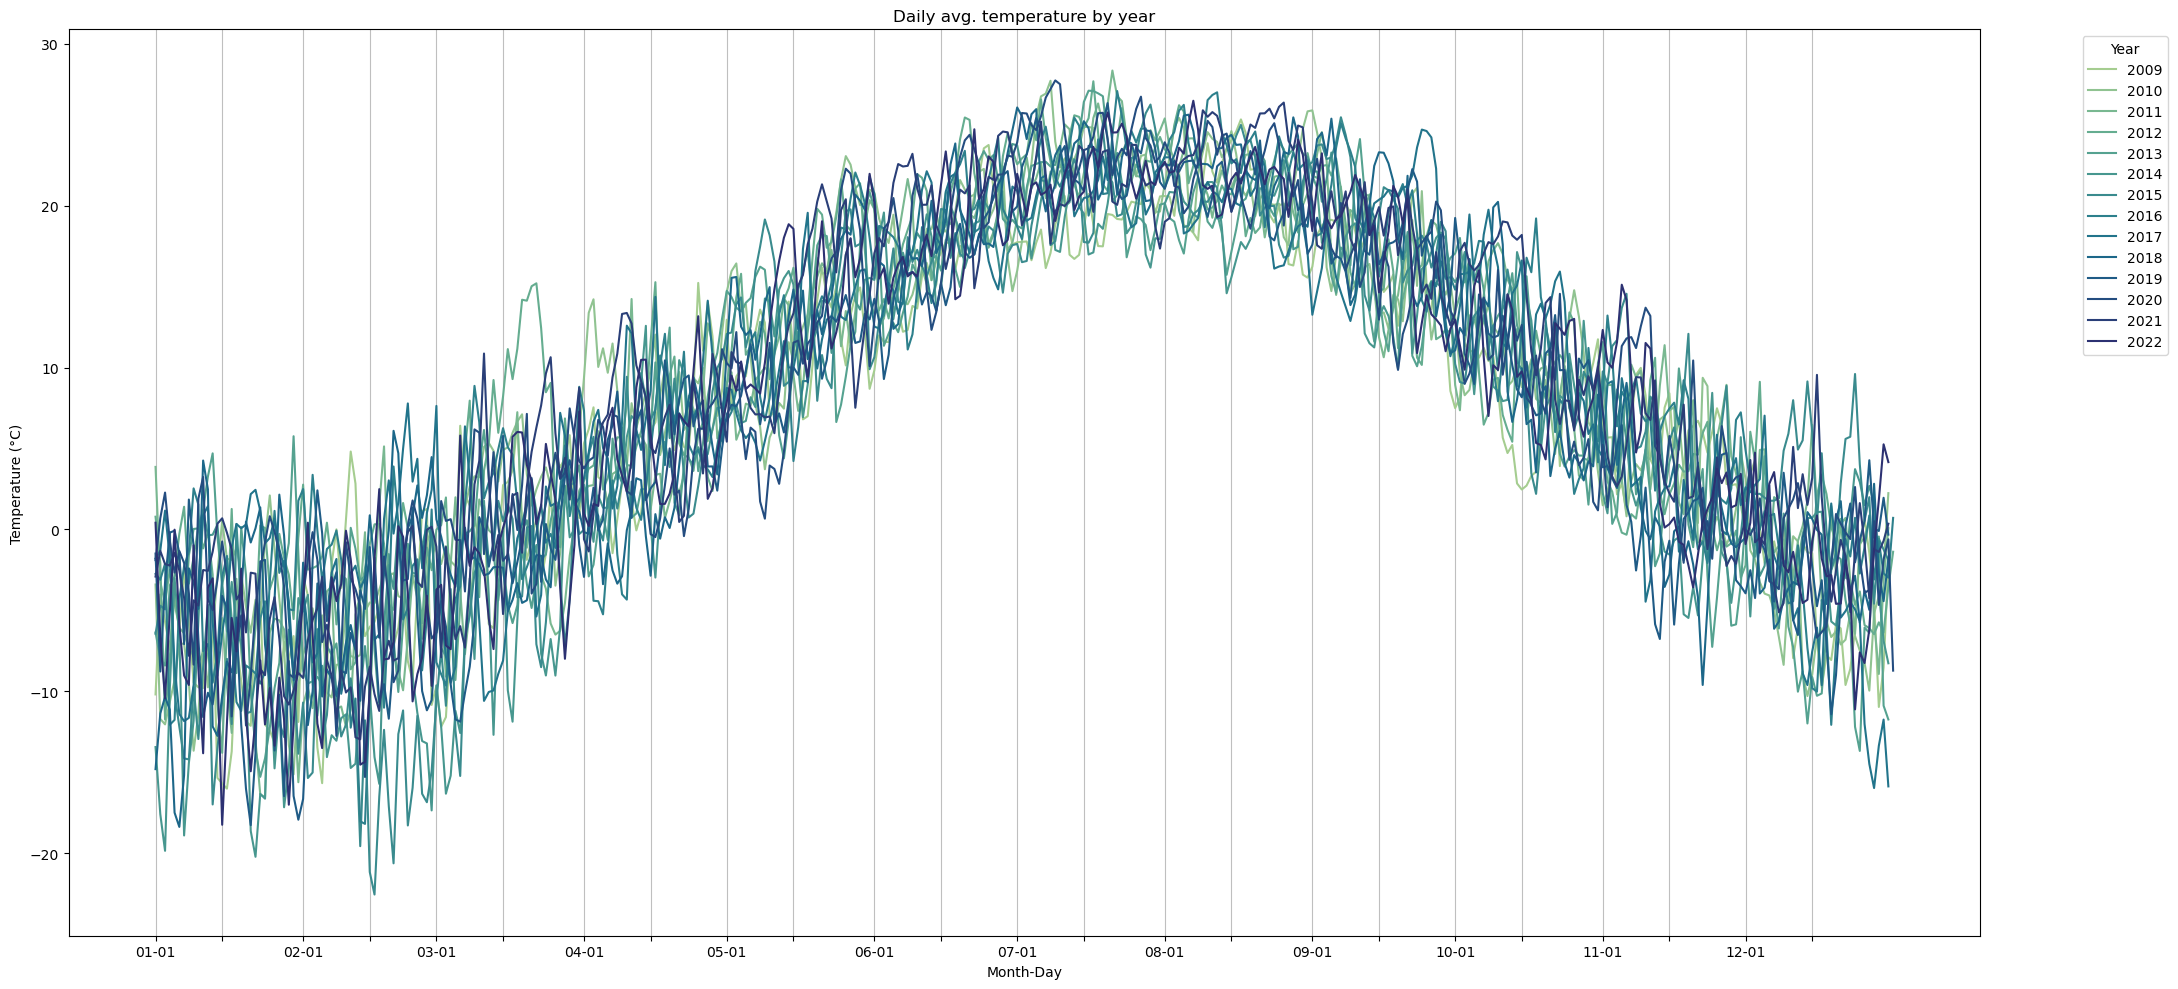

In [8]:
month_starts = [f"{str(month).zfill(2)}-01" for month in range(1, 13)]
month_midpoints = [f"{str(month).zfill(2)}-15" for month in range(1, 13)]
month_starts_and_midpoints = [date for pair in zip(month_starts, month_midpoints) for date in pair]
tick_labels = [date if i % 2 == 0 else '' for i, date in enumerate(month_starts_and_midpoints)]

plt.figure(figsize=(20, 10))
sns.lineplot(x='month-day', y='temperature', hue='year', data=temp_ON[temp_ON.index.year >= 2009], palette='crest', legend='full')

plt.title('Daily avg. temperature by year')
plt.xticks(month_starts_and_midpoints, tick_labels)  # Set custom x-ticks

plt.xlabel('Month-Day')
plt.ylabel('Temperature (°C)')
plt.tight_layout()

# Show x-axis gridlines for better readability
plt.grid(True, which='both', axis='x', linestyle='-', color='gray', alpha=0.5)

# Adjust the legend to not overlap the plot
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

## Hottest and coldest days

In [9]:
temp_ON_2018.index = temp_ON_2018.index.tz_localize('utc')
temp_ON_2018 = temp_ON_2018.set_index(temp_ON_2018.index.tz_convert('est'))

In [10]:
temp_ON_2018_daily = temp_ON[temp_ON.index.year == 2018]

In [11]:
temp_ON_2018.loc['2018-01-01']

,temperature
time,
2018-01-01 00:00:00-05:00,-17.660
2018-01-01 01:00:00-05:00,-17.501
2018-01-01 02:00:00-05:00,-17.235
2018-01-01 03:00:00-05:00,-16.893
2018-01-01 04:00:00-05:00,-16.467
2018-01-01 05:00:00-05:00,-16.004
2018-01-01 06:00:00-05:00,-15.634
2018-01-01 07:00:00-05:00,-15.384
2018-01-01 08:00:00-05:00,-14.957


### Hottest days

In [12]:
temp_ON_2018[temp_ON_2018.temperature > 30.8]

,temperature
time,
2018-07-01 12:00:00-05:00,30.902
2018-07-01 13:00:00-05:00,31.078
2018-07-01 14:00:00-05:00,31.027
2018-07-04 12:00:00-05:00,31.047
2018-07-04 13:00:00-05:00,31.482
2018-07-04 14:00:00-05:00,31.640
2018-07-04 15:00:00-05:00,31.548
2018-07-04 16:00:00-05:00,31.275
2018-08-05 12:00:00-05:00,31.361


In [13]:
temp_ON_2018_daily[temp_ON_2018_daily.temperature > 25] # July 2, 2018 was Monday

,temperature,month-day,year
time,,,
2018-07-01,26.053333,07-01,2018
2018-07-02,25.511875,07-02,2018
2018-07-04,25.634458,07-04,2018
2018-07-05,25.950167,07-05,2018
2018-07-15,25.203458,07-15,2018
2018-08-05,25.546750,08-05,2018
2018-08-06,25.608083,08-06,2018
2018-08-28,25.442333,08-28,2018
2018-09-05,25.360833,09-05,2018


### Coldest days

In [14]:
temp_ON_2018[temp_ON_2018.temperature < -20]

,temperature
time,
2018-01-06 05:00:00-05:00,-20.078
2018-01-06 06:00:00-05:00,-20.156
2018-01-06 07:00:00-05:00,-20.228
2018-01-06 08:00:00-05:00,-20.107
2018-01-06 23:00:00-05:00,-20.006
2018-01-07 00:00:00-05:00,-20.209
2018-01-07 01:00:00-05:00,-20.299
2018-01-07 02:00:00-05:00,-20.207
2018-01-07 03:00:00-05:00,-20.069


In [15]:
temp_ON_2018_daily[temp_ON_2018_daily.temperature < -14.5] # January 1, 2019 was Monday

,temperature,month-day,year
time,,,
2018-01-01,-14.793792,01-01,2018
2018-01-05,-17.481042,01-05,2018
2018-01-06,-18.361375,01-06,2018
2018-01-07,-15.171583,01-07,2018


# Charging profiles

In [16]:
cp_nhts = pd.read_csv('ramp_mobility/results/ON-2022NHTS_2018_v3_newsizes.csv', index_col=0)
cp_tts_wd = pd.read_csv('ramp_mobility/results/ON-2016TTS_2018_no-we_v3_newsizes.csv', index_col=0)

In [17]:
cp_nhts.index = pd.to_datetime(cp_nhts.index, utc=True)
cp_tts_wd.index = pd.to_datetime(cp_tts_wd.index, utc=True)

## Convert UTC timestamps to EST

In [18]:
cp_nhts = cp_nhts.set_index(cp_nhts.index.tz_convert('America/Toronto'))
cp_tts_wd = cp_tts_wd.set_index(cp_tts_wd.index.tz_convert('America/Toronto'))

In [19]:
cp_nhts = cp_nhts.resample('H').mean()
cp_tts_wd = cp_tts_wd.resample('H').mean()

In [20]:
cold_week = temp_ON_2018.loc['2018-01-01':'2018-01-06'] # Monday to Saturday
nhts_cold_week = cp_nhts.loc['2018-01-01':'2018-01-06']
tts_wd_cold_week = cp_tts_wd.loc['2018-01-01':'2018-01-06']

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=cold_week.index, y=cold_week.temperature, name='Population-weighted ambient temperature in Ontario, 2018 (°C)',
                         opacity=0.3), secondary_y=True)
fig.add_trace(go.Scatter(x=nhts_cold_week.index, y=nhts_cold_week['Charging Profile'], name='CP - US National Household Transportation Survey 2022 (kWh)',
                         line=dict(
                                   color='blue', 
                                   # width=4, 
                                 #   dash='dash'
                                   )),
               secondary_y=False)
fig.add_trace(go.Scatter(x=tts_wd_cold_week.index, y=tts_wd_cold_week['Charging Profile'], name='CP - GTHA Transportation Tomorrow Survey 2016 (kWh)',
                         line=dict(
                                   color='red', 
                                   # width=4, 
                                 #   dash='dash'
                                   )),
               secondary_y=False)

fig.update_xaxes(title='Date',
                 showgrid=True)

fig.update_yaxes(title_text='Temperature (°C)', secondary_y=True)
fig.update_yaxes(title_text='Aggregated charging demand (kWh)', secondary_y=False)

fig.update_layout(width=1100,
                  height=550,
                  template='simple_white',
                  title={'text':"Ontario EV Charging profiles populated by different travel surveys (sample peak cold week)",
                         'x':0.5,
                         'y':0.98},
                  legend=dict(orientation='v',
                              y=1.2,
                              x=0),
                  font=dict(
                       # family="Courier New, monospace",
                       size=14,
                       # color="#ffffff"
                       )
                )

fig.show()

In [21]:
hot_week = temp_ON_2018.loc['2018-07-02':'2018-07-07'] # Monday to Saturday
nhts_hot_week = cp_nhts.loc['2018-07-02':'2018-07-07']
tts_wd_hot_week = cp_tts_wd.loc['2018-07-02':'2018-07-07']

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=hot_week.index, y=hot_week.temperature, name='T ambient (°C)',
                         opacity=0.3), secondary_y=True)
fig.add_trace(go.Scatter(x=nhts_hot_week.index, y=nhts_hot_week['Charging Profile'], name='CP - US National Household Transportation Survey 2022 (kWh)',
                         line=dict(
                                   color='blue', 
                                   # width=4, 
                                 #   dash='dash'
                                   )),
               secondary_y=False)
fig.add_trace(go.Scatter(x=tts_wd_hot_week.index, y=tts_wd_hot_week['Charging Profile'], name='CP - GTHA Transportation Tomorrow Survey 2016 (kWh)',
                         line=dict(
                                   color='red', 
                                   # width=4, 
                                 #   dash='dash'
                                   )),
               secondary_y=False)

fig.update_xaxes(title='Date',
                 showgrid=True,
              #    dtick=3600*6*1000
                 )

fig.update_yaxes(title_text='Temperature (°C)', secondary_y=True)
fig.update_yaxes(title_text='Aggregated charging demand (kWh)', secondary_y=False)

fig.update_layout(width=1000,
                  height=500,
                  template='simple_white',
                  title={'text':"Ontario EV Charging profiles populated by different travel surveys (sample peak hot week)",
                         'x':0.5,
                         'y':0.98},
                  legend=dict(orientation='v',
                              y=1.2,
                              x=0),
                  font=dict(
                       # family="Courier New, monospace",
                       size=14,
                       # color="#ffffff"
                       )
                )

fig.show()

# Normalization and preparation

In [22]:
cp_tts_wd = cp_tts_wd / cp_tts_wd.sum()
cp_nhts = cp_nhts / cp_nhts.sum()

In [23]:
cp_tts_wd

,Charging Profile
2018-01-01 00:00:00-05:00,0.000105
2018-01-01 01:00:00-05:00,0.000094
2018-01-01 02:00:00-05:00,0.000098
2018-01-01 03:00:00-05:00,0.000087
2018-01-01 04:00:00-05:00,0.000103
...,...
2018-12-31 19:00:00-05:00,0.000180
2018-12-31 20:00:00-05:00,0.000153
2018-12-31 21:00:00-05:00,0.000128
2018-12-31 22:00:00-05:00,0.000113


In [49]:
cp_tts_wd['Day'] = cp_tts_wd.index.strftime('D%j')
cp_tts_wd['Hour'] = cp_tts_wd.index.strftime('H%H')

In [25]:
sheet = 'DemandDist'
last_col = 'Technological'
spreadsheet = '../transportation/spreadsheet_database/CANOE_FUEL_TRN_ON.xlsx'

cols = pd.read_excel(spreadsheet, sheet_name = sheet, header=None, skiprows=[0], nrows=1).iloc[0].values.tolist()
ncols = cols.index(last_col) #    Last column to read

# Imports the table on the excel sheet
metadata = pd.read_excel(spreadsheet, sheet_name = sheet, skiprows=[0], usecols=range(ncols + 1), nrows=3)

In [26]:
template = '../transportation/canoe_template.xlsx'

dsd_template = pd.read_excel(template, sheet_name = 'DemandSpecificDistribution', header=None, nrows=1).iloc[0].values.tolist()

c:\Users\rashi\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning:

Data Validation extension is not supported and will be removed



In [27]:
metadata

,Target Demand,Region,Reference,Data Year,Notes,Reliability,Representativeness,Temporal,Geographical,Technological
0,T_D_pkm_ldv_c,ON,Data Management Group. (2018). Transportation ...,2018,This distribution represents the hourly variat...,1,2,1,1,1
1,T_D_pkm_ldv_t,ON,Data Management Group. (2018). Transportation ...,2018,This distribution represents the hourly variat...,1,2,1,1,1
2,T_D_tkm_ldv_t,ON,Data Management Group. (2018). Transportation ...,2018,This distribution represents the hourly variat...,1,2,1,1,1


In [40]:
df = pd.DataFrame(columns=dsd_template)
df['dsd'] = cp_tts_wd['Charging Profile'].values
df['season_name'] = cp_tts_wd['Day'].values
df['time_of_day_name'] = cp_tts_wd['Hour'].values

df['demand_name'] = metadata['Target Demand'].values[0]

df['regions'] = metadata['Region'].values[0]
df.loc[df['time_of_day_name'] == 'H00', 'dsd_notes'] = metadata['Notes'].values[0]
df.loc[df['time_of_day_name'] == 'H00', 'reference'] = metadata['Reference'].values[0]
df['data_year'] = metadata['Data Year'].values[0]
df['dq_rel'] = metadata['Reliability'].values[0]
df['dq_comp'] = metadata['Representativeness'].values[0]
df['dq_time'] = metadata['Temporal'].values[0]
df['dq_geog'] = metadata['Geographical'].values[0]
df['dq_tech'] = metadata['Technological'].values[0]

In [42]:
df2 = df.copy()
df3 = df.copy()

df2['demand_name'] = metadata['Target Demand'].values[1]
df3['demand_name'] = metadata['Target Demand'].values[2]

In [43]:
df_merged = pd.concat([df, df2, df3], axis=0)
df_merged = df_merged.where(pd.notnull(df_merged), None)

In [44]:
df_merged

,regions,season_name,time_of_day_name,demand_name,dsd,dsd_notes,reference,data_year,data_flags,dq_est,dq_rel,dq_comp,dq_time,dq_geog,dq_tech,additional_notes
0,ON,D001,H00,T_D_pkm_ldv_c,0.000105,This distribution represents the hourly variat...,Data Management Group. (2018). Transportation ...,2018,None,None,1,2,1,1,1,None
1,ON,D001,H01,T_D_pkm_ldv_c,0.000094,None,None,None,None,None,None,None,None,None,None,None
2,ON,D001,H02,T_D_pkm_ldv_c,0.000098,None,None,None,None,None,None,None,None,None,None,None
3,ON,D001,H03,T_D_pkm_ldv_c,0.000087,None,None,None,None,None,None,None,None,None,None,None
4,ON,D001,H04,T_D_pkm_ldv_c,0.000103,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,ON,D365,H19,T_D_tkm_ldv_t,0.000180,None,None,None,None,None,None,None,None,None,None,None
8756,ON,D365,H20,T_D_tkm_ldv_t,0.000153,None,None,None,None,None,None,None,None,None,None,None
8757,ON,D365,H21,T_D_tkm_ldv_t,0.000128,None,None,None,None,None,None,None,None,None,None,None
8758,ON,D365,H22,T_D_tkm_ldv_t,0.000113,None,None,None,None,None,None,None,None,None,None,None
